In [2]:
import astropy.units as u
import astropy.constants as ac
import numpy as np
from astropy.time import Time

from astropy.coordinates import solar_system_ephemeris
from astropy.coordinates import get_body_barycentric, get_body, get_moon, get_body_barycentric_posvel

from astropy.visualization import astropy_mpl_style
import matplotlib.pyplot as plt
from astropy.visualization import quantity_support, time_support
plt.style.use(astropy_mpl_style)
%matplotlib inline

In [7]:
t0 = Time('2020-10-01 16:00')
delta_times = np.linspace(0, 5000, num=2000) * u.d
t = t0 + delta_times

with solar_system_ephemeris.set('builtin'):
    jup = get_body_barycentric_posvel('jupiter', t)
    ear = get_body_barycentric_posvel('earth',t)
    sun = get_body_barycentric_posvel('sun',t)
    mer = get_body_barycentric_posvel('mercury',t)
    sat = get_body_barycentric_posvel('saturn', t)

In [3]:
v_jupmer = jup[1] - mer[1]
r_jupmer = jup[0] - mer[0]
plt.semilogy(delta_times, (ac.GM_jup / r_jupmer.cross(v_jupmer).norm() / ac.c).decompose(), label="Mercury-Jupiter")

v_sunmer = sun[1] - mer[1]
r_sunmer = sun[0] - mer[0]
plt.plot(delta_times, (ac.GM_sun / r_sunmer.cross(v_sunmer).norm() / ac.c).decompose(), label="Mercury-Sun")

# plt.xlabel('Days from today')
# plt.ylabel('Relative size of correction, log scale')
# plt.legend()

[&lt;matplotlib.lines.Line2D at 0x7ff00dd47430&gt;]

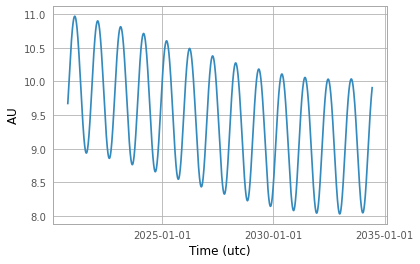

In [8]:
r = sat[0] - ear[0]
with quantity_support() as q_supp, time_support() as time_supp:
    plt.plot(t, r.norm())
    plt.show()